# **Net Hourly Wage Analysis of 27 Countries using Big Mac Index**




***The Big Mac index*** is a survey created by The Economist magazine in 1986 to measure *Purchasing Power Parity (PPP)* between nations, using the price of a McDonald's Big Mac as the benchmark. Purchasing power parity is an economic theory which states that exchange rates over time should move in the direction of equality across national borders in the price charged for an identical basket of goods. In this case, the basket of goods is a Big Mac.

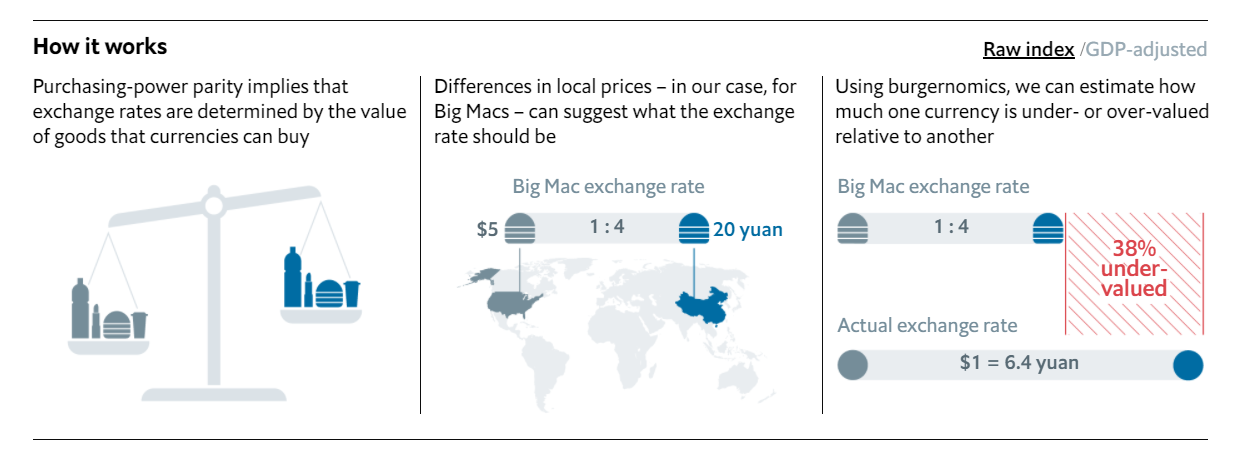
Burgernomics was never intended as a precise gauge of currency misalignment, merely a tool to make exchange-rate theory more digestible.

In [ ]:
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
import os
os.chdir('drive/My Drive/ML Project')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('big_mac.xlsx')

In [ ]:
df.head()

,big_mac_price,hourly_wages_usd
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


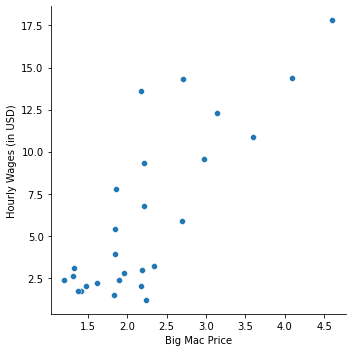

In [ ]:
sns.relplot(x="big_mac_price",y="hourly_wages_usd", data = df).set(xlabel="Big Mac Price", ylabel="Hourly Wages (in USD)")
plt.show()

# **Using Regression for Analysis**


In [ ]:
import statsmodels.api as sn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = sn.OLS.from_formula("hourly_wages_usd ~ big_mac_price", data=df).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       hourly_wages_usd   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.50e-07
Time:                        09:00:03   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.5397      1.619     -2.805

# **Hypothesis Testing and Fitting**

In [ ]:
net_hourly_wages_pred = -4.5397 + 4.7435 * df["big_mac_price"]

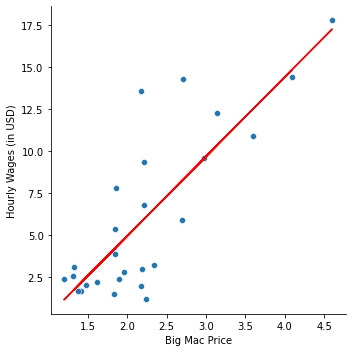

In [ ]:
sns.relplot(x="big_mac_price",y="hourly_wages_usd", data = df).set(xlabel="Big Mac Price", ylabel="Hourly Wages (in USD)")
plt.plot(df['big_mac_price'], net_hourly_wages_pred, "r-")
plt.show()

# **Analysis of Variance(ANOVA) and F-Statistics**

F - Statistics = $ \frac{(ssr/df_ssr)}{(sse/df_sse)} $ - This denotes the statistical significance of the Model

In [ ]:
ssr = np.sum(np.square(net_hourly_wages_pred - net_hourly_wages_pred.mean()))
sse = np.sum(np.square(net_hourly_wages_pred - df['hourly_wages_usd'].values))
ssr, sse

(418.1817241247, 213.88429646337502)

In [ ]:
df_ssr = 1 # K is the number of indepedent features
df_sse = 27 -1 - df_ssr

In [ ]:
F_stats = (ssr/df_ssr)/(sse/df_sse)
F_stats

48.879432833479235

R_Square = 1 - $ \frac{sse}{sse} $

In [ ]:
sst = sse + ssr
r_square = 1 - (sse/sst)
print("Value of R_Square =", r_square)

Value of R_Square = 0.6616108294124452


# **Model Correlation and Relevance**

In [ ]:
df.corr()


,big_mac_price,hourly_wages_usd
big_mac_price,1.000000,0.813396
hourly_wages_usd,0.813396,1.000000


In [ ]:
np.square(0.813396)

0.661613052816

Based on our regression model and hypothesis testing, we find a strong relationship between the net hourly wages of workers and the price of a Big Mac; with a correlation value of `81.33%`  

The present strength of the model is `66.2` and can be developed further since the F-Stats value is significant.